
Logistic Regression Results:
Accuracy: 0.9116899618805591
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.28      0.41       178
           1       0.91      0.99      0.95      1396

    accuracy                           0.91      1574
   macro avg       0.87      0.63      0.68      1574
weighted avg       0.91      0.91      0.89      1574

Confusion Matrix:
 [[  49  129]
 [  10 1386]]

Naive Bayes Results:
Accuracy: 0.8939008894536213
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.07      0.13       178
           1       0.89      1.00      0.94      1396

    accuracy                           0.89      1574
   macro avg       0.88      0.54      0.54      1574
weighted avg       0.89      0.89      0.85      1574

Confusion Matrix:
 [[  13  165]
 [   2 1394]]

Random Forest Results:
Accuracy: 0.9155019059720457
Classification Report:
               preci

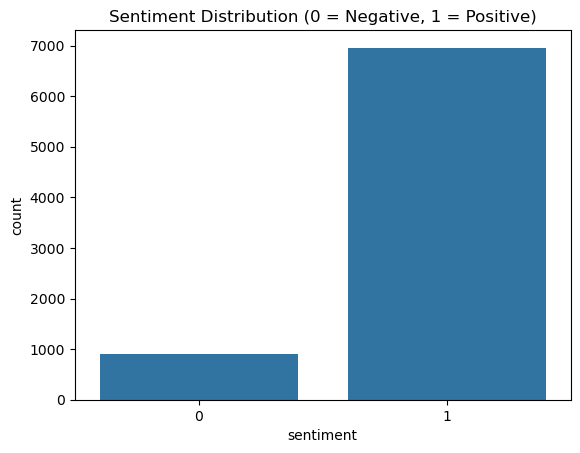

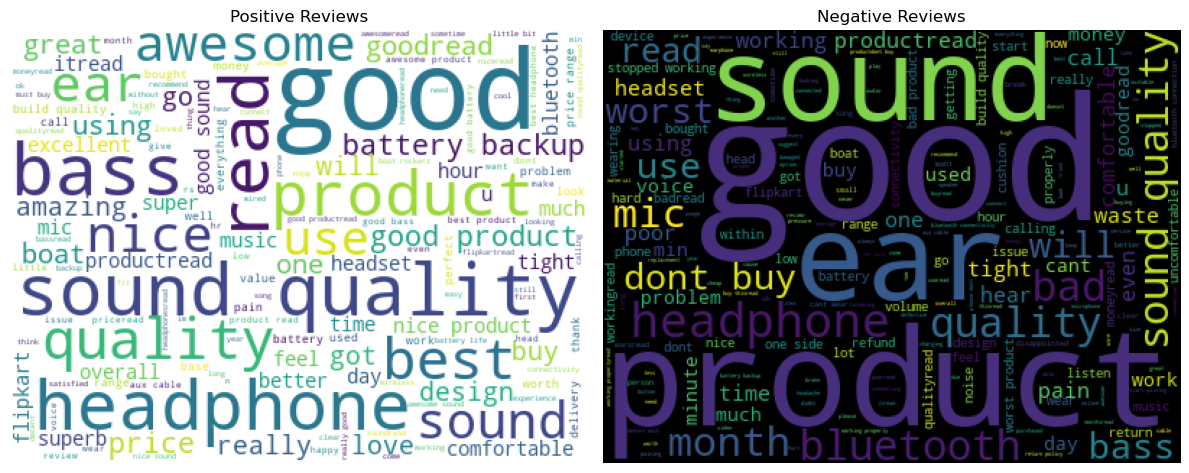

In [13]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re, string
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 2. Load Dataset
df = pd.read_csv(r"C:\Users\HP\Downloads\flipkart_data.csv")
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

# 3. Create Sentiment Labels from 'rating'
df['sentiment'] = df['rating'].apply(lambda x: 1 if x >= 3 else 0)

# 4. Text Cleaning
def clean_text(text):
    text = text.lower()
    text = re.sub(rf"[{string.punctuation}]", "", text)
    text = re.sub(r"\d+", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

df['cleaned_reviews'] = df['review'].apply(clean_text)

# 5. TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=3000)
X = vectorizer.fit_transform(df['cleaned_reviews'])
y = df['sentiment']

# 6. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Model Training and Evaluation
models = {
    'Logistic Regression': LogisticRegression(max_iter=500),
    'Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'SVM': SVC()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} Results:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 8. Sentiment Distribution Plot
sns.countplot(data=df, x='sentiment')
plt.title('Sentiment Distribution (0 = Negative, 1 = Positive)')
plt.show()

# 9. WordClouds for Positive and Negative Reviews
positive_reviews = " ".join(df[df['sentiment'] == 1]['cleaned_reviews'])
negative_reviews = " ".join(df[df['sentiment'] == 0]['cleaned_reviews'])

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(WordCloud(width=400, height=300, background_color='white').generate(positive_reviews))
plt.title("Positive Reviews")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(WordCloud(width=400, height=300, background_color='black').generate(negative_reviews))
plt.title("Negative Reviews")
plt.axis("off")

plt.tight_layout()
plt.show()